# Housing prices NSW: The effects of demographic factors on the house prices of suburbs

<img src="files/images/houses.png" width ="1000" height="200"/>

**Group 107**
- Maya Assaf 46491953
- Pranava Brown 45334412
- Juyoung Lee 45259666
- Joon Hun Yang 46564551  

## Introduction 
Growing up in Sydney, one of the most expensive property markets in the world, it isn’t unrealistic for Generation Z to view buying a house as an impossibility. What was once just an a-given milestone in our parents’ lives is now something that many of us have to plan and save for decades in advance. With this project, we sought to investigate and forecast house prices, how the prices vary depending on certain factors and conclude which factors have the most impact on house prices.

## Project Goals
The outcome of the project will be to identify the relationship between demographics and house sales and how it influences house prices of an area. We will be focusing on some of the most important demographic factors such as income, ethnicity, age and cultural background. We will also investigate other relationships to identify which factor has the greatest impact on prices. Many of these factors will correlate with one another for a highly reliable and accurate analysis. The aim is to have a working model that can be used by investors to locate postcodes with positive demographic factors and future growth potential.

## Data
[House sales](https://www.facs.nsw.gov.au/resources/statistics/rent-and-sales/back-issues), [SEIFA (Socio-Economic Indexes for Areas)](https://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA) and [ERP(Estimated Resident Population)](https://www.abs.gov.au/statistics/people/population/regional-population-age-and-sex/latest-release#data-download) data to be used for our project will be sourced from the [Australian Bureau of Statistics](https://www.abs.gov.au/) and [New South Wales Department of Family and Community](https://www.facs.nsw.gov.au/). The house sales reports are available in .xlsx format published quarterly which will need to be collated and converted to CSV files with Excel. We plan to interact with the census data with house sales to determine the demographic factors influencing house prices.



## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, glob

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import re

## Importing Files and Data Preparation

In [2]:
# load datasets
hpNSW = pd.read_csv('files/housing/masterDf.csv', dtype={'GMR (Greater Metropolitan Region)': 'str', 'Local Government Areas (LGAs)': 'str'})
erp=pd.read_csv('files/demographics/erp_2001-2020.csv')
seifa=pd.read_csv('files/demographics/seifa_2016.csv')

### House Sales 

In [3]:
print(hpNSW.shape)
hpNSW.head(5)

(33308, 16)


,Year,Quarter,GMR (Greater Metropolitan Region),Greater Sydney,Rings,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price\r\n$'000s000,Median Sales Price\r\n$'000s000,Third Quartile Sales Price\r\n'000s000,Mean Sales Price\r\n$'000s000,Sales\r\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018,Q1,Total,Total,Total,Total,Total,465000,655000,913000,802000,26046,-2.96%,0.00%,-19.39%,-19.00%
1,2018,Q1,Total,Total,Total,Total,Non Strata,449000,655000,950000,833000,17865,-3.68%,0.77%,-19.66%,-15.72%
2,2018,Q1,Total,Total,Total,Total,Strata,495000,660000,862000,734000,8181,-1.90%,-0.96%,-18.81%,-25.34%
3,2018,Q1,Total,Total,Total,Albury,Total,236000,297000,390000,323000,264,-7.27%,-1.74%,-15.38%,3.13%
4,2018,Q1,Total,Total,Total,Albury,Non Strata,260000,335000,418000,350000,200,1.06%,-4.43%,-21.26%,-1.48%


In [4]:
# check for NaN values
hpNSW.isna().sum()

Year                                       0
Quarter                                    0
GMR (Greater Metropolitan Region)          0
Greater Sydney                             0
Rings                                      0
Local Government Areas (LGAs)              0
DwellingType                               0
First Quartile Sales Price\r\n$'000s000    0
Median Sales Price\r\n$'000s000            0
Third Quartile Sales Price\r\n'000s000     0
Mean Sales Price\r\n$'000s000              0
Sales\r\nNo.                               0
Qtly change in Median                      0
Annual change in Median                    0
Qtly change in Count                       0
Annual change in Count                     0
dtype: int64

There were no NAN values found to be dropped from dataset.

In [5]:
#removing strata and non strata values from df
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['GMR (Greater Metropolitan Region)']=='GMR (Greater Metropolitan Region)'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['GMR (Greater Metropolitan Region)']=='Rest of State'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Greater Sydney']=='Greater Sydney'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Greater Sydney']=='Rest of GMR'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Greater Sydney']=='Rest of State'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Inner Ring'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Middle Ring'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Newcastle SSD'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Outer Ring'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Rest of State'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['Rings']=='Wollongong SSD'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['DwellingType']=='Strata'].index)
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['DwellingType']=='Non Strata'].index)
hpNSW.reset_index(drop=True, inplace=True)
hpNSW.head()

,Year,Quarter,GMR (Greater Metropolitan Region),Greater Sydney,Rings,Local Government Areas (LGAs),DwellingType,First Quartile Sales Price\r\n$'000s000,Median Sales Price\r\n$'000s000,Third Quartile Sales Price\r\n'000s000,Mean Sales Price\r\n$'000s000,Sales\r\nNo.,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
0,2018,Q1,Total,Total,Total,Total,Total,465000,655000,913000,802000,26046,-2.96%,0.00%,-19.39%,-19.00%
1,2018,Q1,Total,Total,Total,Albury,Total,236000,297000,390000,323000,264,-7.27%,-1.74%,-15.38%,3.13%
2,2018,Q1,Total,Total,Total,Armidale Regional,Total,288000,345000,451000,370000,115,1.47%,6.15%,-8.73%,1.77%
3,2018,Q1,Total,Total,Total,Ballina,Total,500000,639000,850000,712000,176,7.53%,14.73%,-9.74%,-22.81%
4,2018,Q1,Total,Total,Total,Balranald,Total,0,0,0,0,0,0,0,0,0


The original dataset had many subsections of data and for our analysis we just wanted the total median sales of both strata and non-strata dwellings across all NSW. To achieve this and simplify our dataset, we have dropped the rows containing non-strata and strata prices along with rows containing data within specific regions/rings in NSW.

In [6]:
# datatypes of columns
hpNSW.dtypes

Year                                        int64
Quarter                                    object
GMR (Greater Metropolitan Region)          object
Greater Sydney                             object
Rings                                      object
Local Government Areas (LGAs)              object
DwellingType                               object
First Quartile Sales Price\r\n$'000s000     int64
Median Sales Price\r\n$'000s000             int64
Third Quartile Sales Price\r\n'000s000      int64
Mean Sales Price\r\n$'000s000               int64
Sales\r\nNo.                                int64
Qtly change in Median                      object
Annual change in Median                    object
Qtly change in Count                       object
Annual change in Count                     object
dtype: object

In [7]:
# renaming columns
hpNSW.rename(
    columns={"First Quartile Sales Price\r\n$'000s000": "Lower_Bound_Sales",
             "Median Sales Price\r\n$'000s000": "Median_Sales", 
             "Third Quartile Sales Price\r\n'000s000": "Upper_Bound_Sales", 
             "Mean Sales Price\r\n$'000s000": "Mean_Sales",
             "Sales\nNo.": "No_Of_Sales",
             "Local Government Areas (LGAs)":"LGA"},
    inplace=True)

### Estimated Resident Population (ERP)

In [8]:
# remove unnecessary characters from string and drop columns from erp data
print(erp.shape)
lga = erp['Region'].str.replace(' \([ACSRCDMT]+\)', '')
erp['LGA'] = lga
erp = erp.drop(['Measure', 'Age','Region','Flag Codes','Flags','TIME','FREQUENCY','Frequency','LGA_2020','SEX_ABS'], axis=1)
erp = erp[erp['Time'] >= 2018]
erp.rename(columns={"Time":"Year"},  inplace=True)
erp.head()

(141360, 15)


<ipython-input-8-59868d62db3a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = erp['Region'].str.replace(' \([ACSRCDMT]+\)', '')


,MEASURE,Sex,AGE,Year,Value,LGA
17,ERP,Males,A04,2018,1922,Albury
18,ERP,Males,A04,2019,1931,Albury
19,ERP,Males,A04,2020,1932,Albury
37,ERP,Females,A04,2018,1712,Albury
38,ERP,Females,A04,2019,1794,Albury


ERP data gives us the population of males and females between certain age groups across LGAs in NSW. Irrelevant/ duplicate columns were dropped along with rows containing information prior to 2018 as this is not relevant for our analysis. As this is catagorical data, we needed to find a way to make it available to use with our house price dataset/

In [9]:
# data types of erp dataset
erp.dtypes

MEASURE    object
Sex        object
AGE        object
Year        int64
Value       int64
LGA        object
dtype: object

In [10]:
# inspecting the different catagories for age to form groups
print(erp['AGE'].unique())

['A04' 'A59' 'A10' 'A15' 'A20' 'A25' 'A30' 'A35' 'A40' 'A45' 'A50' 'A55'
 'A60' 'A65' 'A70' 'A75' 'A80' 'TT' '8599']


In [11]:
erp_males=erp.drop(index=erp[erp['Sex']=='Females'].index)
erp_males=erp_males.drop(index=erp_males[erp_males['Sex']=='Persons'].index)
erp_males = erp_males.groupby(['LGA', 'Year']).agg({'Value': np.sum})
erp_males.rename(columns={"Value":"Male_Pop"},  inplace=True)
erp_males.head()

Male_Pop
LGA               Year          
Albury            2018     52002
                  2019     52682
                  2020     53110
Armidale Regional 2018     28900
                  2019     29062

In [12]:
erp_females=erp.drop(index=erp[erp['Sex']=='Males'].index)
erp_females=erp_females.drop(index=erp_females[erp_females['Sex']=='Persons'].index)
erp_females = erp_females.groupby(['LGA', 'Year']).agg({'Value': np.sum})
erp_females.rename(columns={"Value":"Fem_Pop"},  inplace=True)
erp_females.head()

Fem_Pop
LGA               Year         
Albury            2018    55408
                  2019    56006
                  2020    57000
Armidale Regional 2018    30510
                  2019    30562

In [13]:
youth_dropparams = ['A20', 'A25', 'A30', 'A35', 'A40', 'A45', 'A50', 'A55',
 'A60', 'A65', 'A70', 'A75', 'A80', 'TT', '8599']

In [14]:
youth=erp.drop(index=erp[erp['AGE']=='A25'].index)
youth=youth.drop(index=youth[youth['AGE']=='A30'].index)
youth=youth.drop(index=youth[youth['AGE']=='A35'].index)
youth=youth.drop(index=youth[youth['AGE']=='A40'].index)
youth=youth.drop(index=youth[youth['AGE']=='A45'].index)
youth=youth.drop(index=youth[youth['AGE']=='A50'].index)
youth=youth.drop(index=youth[youth['AGE']=='A55'].index)
youth=youth.drop(index=youth[youth['AGE']=='A60'].index)
youth=youth.drop(index=youth[youth['AGE']=='A65'].index)
youth=youth.drop(index=youth[youth['AGE']=='A70'].index)
youth=youth.drop(index=youth[youth['AGE']=='A75'].index)
youth=youth.drop(index=youth[youth['AGE']=='A80'].index)
youth=youth.drop(index=youth[youth['AGE']=='TT'].index)
youth=youth.drop(index=youth[youth['AGE']=='8599'].index)
youth=youth.drop(index=youth[youth['Sex']=='Males'].index)
youth=youth.drop(index=youth[youth['Sex']=='Females'].index)
youth = youth.groupby(['LGA', 'Year']).agg({'Value': np.sum})
youth.rename(columns={"Value":"Youth_Pop"},  inplace=True)
youth.head()

Youth_Pop
LGA               Year           
Albury            2018      17559
                  2019      17689
                  2020      17684
Armidale Regional 2018      11021
                  2019      11013

In [15]:
working=erp.drop(index=erp[erp['AGE']=='8599'].index)
working=working.drop(index=working[working['AGE']=='A04'].index)
working=working.drop(index=working[working['AGE']=='A59'].index)
working=working.drop(index=working[working['AGE']=='A10'].index)
working=working.drop(index=working[working['AGE']=='A15'].index)
working=working.drop(index=working[working['AGE']=='A20'].index)
working=working.drop(index=working[working['AGE']=='A65'].index)
working=working.drop(index=working[working['AGE']=='A70'].index)
working=working.drop(index=working[working['AGE']=='A75'].index)
working=working.drop(index=working[working['AGE']=='A80'].index)
working=working.drop(index=working[working['AGE']=='TT'].index)
working=working.drop(index=working[working['Sex']=='Males'].index)
working=working.drop(index=working[working['Sex']=='Females'].index)
working = working.groupby(['LGA', 'Year']).agg({'Value': np.sum})
working.rename(columns={"Value":"Working_Pop"},  inplace=True)
working.head()

Working_Pop
LGA               Year             
Albury            2018        26559
                  2019        26820
                  2020        27263
Armidale Regional 2018        13772
                  2019        13774

In [16]:
retirees=erp.drop(index=erp[erp['AGE']=='A04'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A04'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A59'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A10'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A15'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A20'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A25'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A30'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A35'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A40'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A45'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A50'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A55'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='A60'].index)
retirees=retirees.drop(index=retirees[retirees['AGE']=='TT'].index)
retirees=retirees.drop(index=retirees[retirees['Sex']=='Males'].index)
retirees=retirees.drop(index=retirees[retirees['Sex']=='Females'].index)
retirees = retirees.groupby(['LGA', 'Year']).agg({'Value': np.sum})
retirees.rename(columns={"Value":"Retirees_Pop"},  inplace=True)
retirees.head()

Retirees_Pop
LGA               Year              
Albury            2018          9587
                  2019          9835
                  2020         10108
Armidale Regional 2018          4912
                  2019          5025

Interesting demographics from the ERP data we have extrapolated for use in our models are the populations of men, female and then the population of age groups from the youth (0-24), working class(24-65) and retirees in that LGA. These all make for very interesting and insightful demographic factors to be used in our regression.

### SEIFA (Socio-Economic Indexes for Areas) 

In [17]:
# remove unnecessary characters from string and drop columns from seifa data
lga = seifa["Local Government Areas - 2016"].str.replace(' \([ACSRCDMT]+\)', '')
seifa['LGA'] = lga
seifa = seifa.drop(['Flag Codes', 'Flags','TIME', 'Local Government Areas - 2016'], axis=1)
seifa.head()

<ipython-input-17-49dfb74c3031>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2016"].str.replace(' \([ACSRCDMT]+\)', '')


,LGA_2016,SEIFAINDEXTYPE,Index Type,SEIFA_MEASURE,Measure,Time,Value,LGA
0,10750,IEO,Index of Education and Occupation,SCORE,Score,2016,968,Blacktown
1,10750,IEO,Index of Education and Occupation,RWAR,Rank within Australia,2016,316,Blacktown
2,10750,IEO,Index of Education and Occupation,RWAD,Rank within Australia - Decile,2016,6,Blacktown
3,10750,IEO,Index of Education and Occupation,RWAP,Rank within Australia - Percentile,2016,58,Blacktown
4,10750,IEO,Index of Education and Occupation,RWSR,Rank within State or Territory,2016,78,Blacktown


In [18]:
# create pivot table with the different SCORE measures and the population URP field
LGA_scores = seifa[seifa.SEIFA_MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["SEIFAINDEXTYPE"], values="Value")
LGA_pop = seifa[seifa.SEIFA_MEASURE == 'URP'].pivot_table(index="LGA", columns=["SEIFAINDEXTYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

SEIFAINDEXTYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
Blacktown,968,1011,993,986,336962
Blue Mountains,1070,1039,1042,1045,76904
Burwood,1067,944,1043,999,36809
Camden,1003,1104,1056,1056,78218
Campbelltown,932,977,948,950,157006


The four indexes included in SEIFA are: 

- Index of Relative Socio-economic Disadvantage (IRSD)
- Index of Relative Socio-economic Advantage and Disadvantage (IRSAD)
- Index of Economic Resources (IER)
- Index of Education and Occupation (IEO)


This new pivot table converts the SEIFA data into an simpler format to be merged with our other data sets. We only wanted to look at the SCORE and URP measures. The SCORE represents the weighted characteristics of that area which are then standardised with a mean of 1000 and a standard deviation of 100 making it a good value to use in our regression. The URP represents the Usual Resident Population and is a key demographic factor we wanted to investigate as well.The other measures were dropped as the score was a good enough indicator for our demographic indexes.

# Data Visualisation and Exploration 

### Median House Price Trend Across NSW

In [19]:
# calculate median price of houses for each year
Median_price_18 = hpNSW.loc[(hpNSW['Year'] == 2018) & (hpNSW['LGA'] == 'Total'), 'Median_Sales'].sum()
Median_price_19 = hpNSW.loc[(hpNSW['Year'] == 2019) & (hpNSW['LGA'] == 'Total'), 'Median_Sales'].sum()
Median_price_20 = hpNSW.loc[(hpNSW['Year'] == 2020) & (hpNSW['LGA'] == 'Total'), 'Median_Sales'].sum()

print('Median house prices for 2018:', '${:,.2f}'.format(Median_price_18))
print('Median house prices for 2019:', '${:,.2f}'.format(Median_price_19))
print('Median house prices for 2020:', '${:,.2f}'.format(Median_price_20))

Median house prices for 2018: $2,590,000.00
Median house prices for 2019: $2,651,000.00
Median house prices for 2020: $2,779,000.00


<ipython-input-20-550c2f50ee98>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


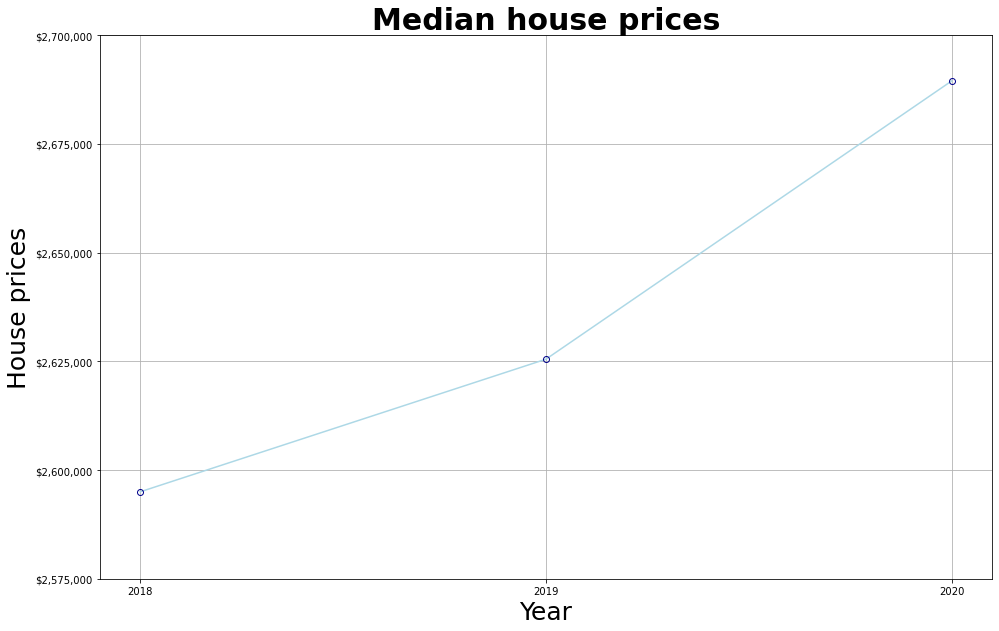

In [20]:
# line graph to visualize the trend in house prices between 2018 - 2020
plt.figure(figsize=(16, 10))
sns.lineplot(x=['2018', '2019', '2020'], y=[Median_price_18, Median_price_19, Median_price_20], marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'darkblue', markerfacecolor = 'None')

# labels
plt.title('Median house prices', fontsize=30, fontweight='bold')
plt.ylabel('House prices', fontsize=25)
plt.xlabel('Year', fontsize=25)

# x, y labels format
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])
plt.ylim((2550000, 2800000))

# grid
plt.grid()   
plt.show()

The overall housing market across NSW is growing at an increasing rate. The median house price for the whole of NSW rose from 2.59 million to 2.78 million during 2018-2020.

### Number of houses sold across all NSW LGA's (2018 ~ 2020)

In [21]:
YearTotals = hpNSW[['Year', 'No_Of_Sales']].groupby(by='Year').sum()
YearTotals.reset_index(inplace= True)
YearTotals

,Year,No_Of_Sales
0,2018,197352
1,2019,207176
2,2020,244124


<ipython-input-22-b7e21eaca275>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


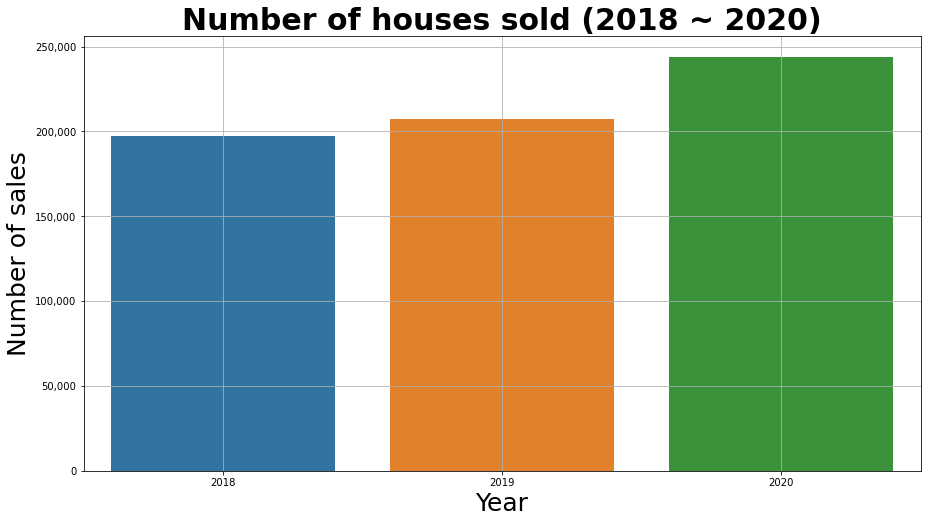

In [22]:
# bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='No_Of_Sales', data=YearTotals)

# labels
plt.title('Number of houses sold (2018 ~ 2020)', fontsize=30, fontweight='bold')
plt.ylabel('Number of sales', fontsize=25)
plt.xlabel('Year', fontsize=25)

# x, y labels format
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# grid
plt.grid()   

Number of houses selling each year is increasing showing there is still a strong supply and demand in the housing market.

### Median House Prices Per Year Per LGA

In [23]:
# drop the total rows for LGA 
hpNSW=hpNSW.drop(index=hpNSW[hpNSW['LGA']=='Total'].index)

In [24]:
# mean sales of an LGA per year
sales_yr = hpNSW.groupby(['LGA', 'Year']).agg({'Lower_Bound_Sales': np.mean, 'Median_Sales': np.mean, 'Upper_Bound_Sales': np.mean, 'Mean_Sales': np.mean})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
sales_yr.reset_index(1, inplace=True)

In [25]:
sales_yr

,Year,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales
LGA,,,,,
Albury,2018,"234,750.00","305,000.00","403,250.00","329,750.00"
Albury,2019,"245,750.00","327,500.00","427,000.00","344,250.00"
Albury,2020,"252,250.00","335,750.00","445,500.00","363,000.00"
Armidale Regional,2018,"274,000.00","342,750.00","436,750.00","365,250.00"
Armidale Regional,2019,"259,750.00","333,250.00","419,500.00","345,500.00"
Armidale Regional,2020,"279,500.00","352,500.00","440,000.00","365,000.00"
Ballina,2018,"502,250.00","618,500.00","778,750.00","669,250.00"
Ballina,2019,"507,500.00","613,500.00","777,000.00","674,000.00"
Ballina,2020,"554,000.00","694,750.00","894,750.00","759,500.00"


<ipython-input-26-2e5de427b4cf>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])


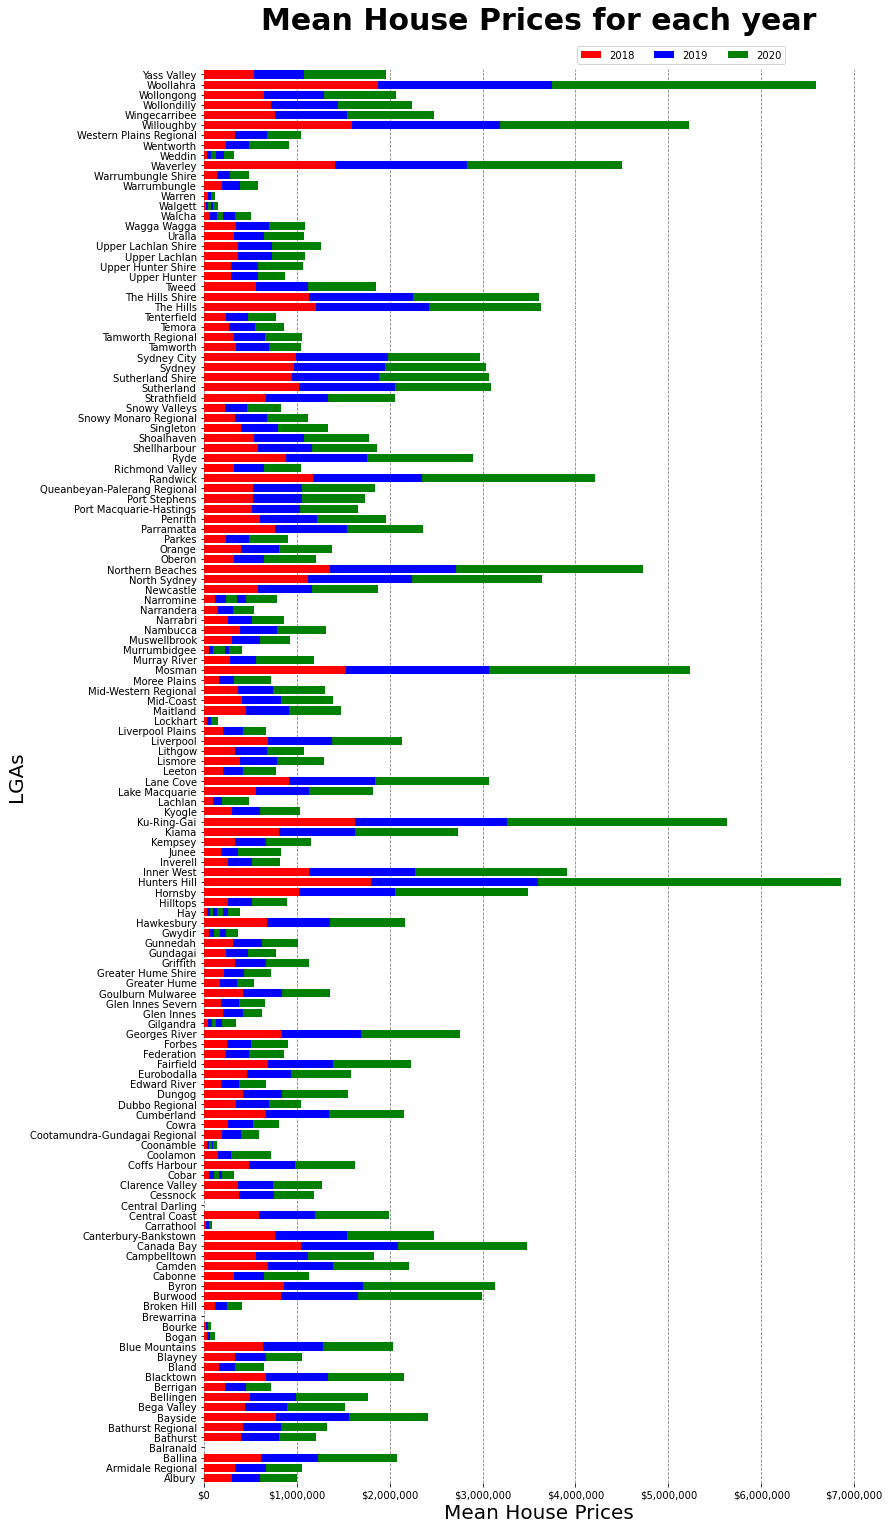

In [26]:
# sort values
sales_yr.sort_values('Median_Sales')

fields = ['Median_Sales','Median_Sales','Median_Sales']
colors = ['#FF0000', '#0000FF', '#008000']
labels = ['2018', '2019', '2020']

# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 26))

# plot bars
left = len(sales_yr) * [0]
for idx, name in enumerate(fields):
    plt.barh(sales_yr.index, sales_yr[name], left = left, color=colors[idx])
    left = left + sales_yr[name]
    
# title, legend, labels
plt.title('Mean House Prices for each year\n', fontsize=30, fontweight='bold')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=3)
plt.xlabel('Mean House Prices', fontsize=20)
plt.ylabel('LGAs', fontsize=20)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# format x axis labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

The stacked bar chart lets us take a better look at the individual LGA prices across the past 3 years over NSW. As we can see there is a large price range with some LGA's such as Woollhara, Hunters Hill and Willoughby having yearly median house prices easily over 1 million whereas suburbs such as Albury, Broken Hill and others a much less than 1 million. This would mean that although house prices are rising across the state, there may be some outlier suburbs such as the ones listed above that are significantly increasing the mean house price across the state.

### Mean House Price (2018-2020) per LGA

<ipython-input-27-4860147e1f3d>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])


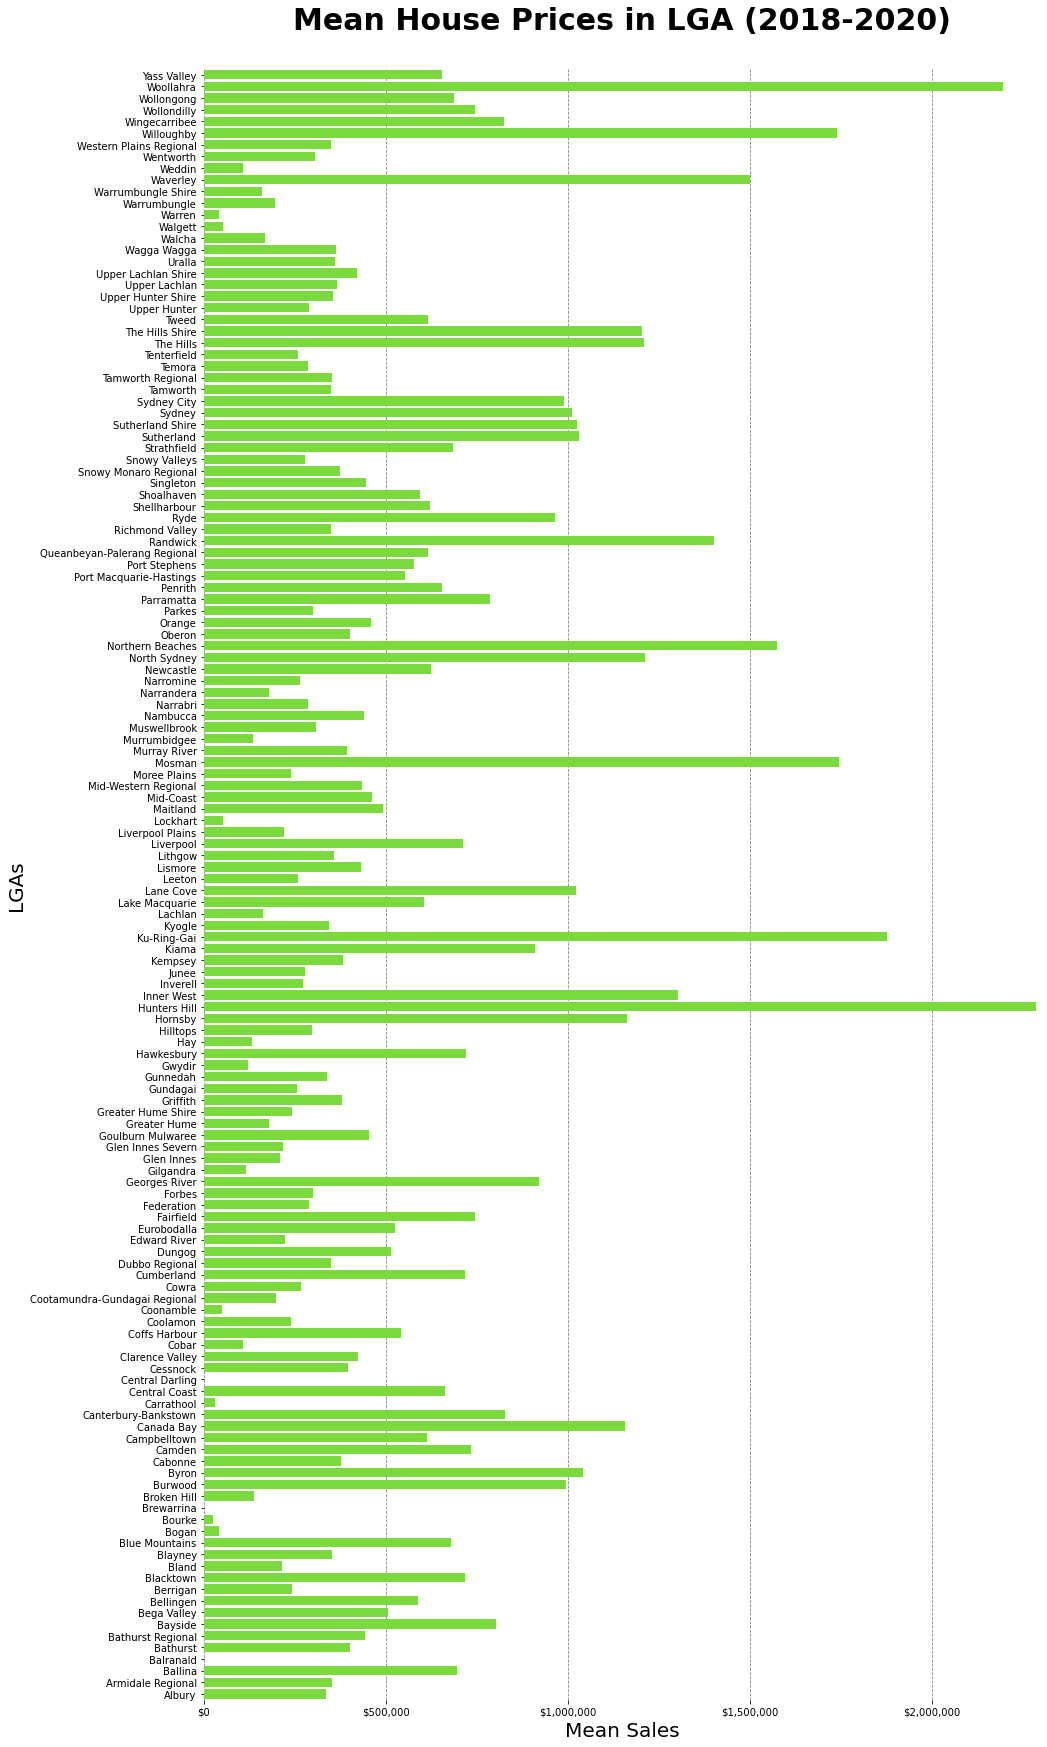

In [27]:
# sort values
sales_yr.sort_values('Median_Sales')

fields = ['Median_Sales']
colors = ['#7AD93C']

# figure and axis
fig, ax = plt.subplots(1, figsize=(15, 30))

# plot bars
left = len(sales_yr) * [0]
for idx, name in enumerate(fields):
    plt.barh(sales_yr.index, sales_yr[name], left = left, color=colors[idx])
    left = left + sales_yr[name]
    
# title, legend, labels
plt.title('Mean House Prices in LGA (2018-2020)\n', fontsize=30, fontweight='bold')
plt.xlabel('Mean Sales', fontsize=20)
plt.ylabel('LGAs', fontsize=20)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# format x axis labels
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['${:,.0f}'.format(x) for x in current_values])

# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
plt.xlim(0, 2300000)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [28]:
hpNSW

,Year,Quarter,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA,DwellingType,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales,No_Of_Sales,Qtly change in Median,Annual change in Median,Qtly change in Count,Annual change in Count
1,2018,Q1,Total,Total,Total,Albury,Total,236000,297000,390000,323000,264,-7.27%,-1.74%,-15.38%,3.13%
2,2018,Q1,Total,Total,Total,Armidale Regional,Total,288000,345000,451000,370000,115,1.47%,6.15%,-8.73%,1.77%
3,2018,Q1,Total,Total,Total,Ballina,Total,500000,639000,850000,712000,176,7.53%,14.73%,-9.74%,-22.81%
4,2018,Q1,Total,Total,Total,Balranald,Total,0,0,0,0,0,0,0,0,0
5,2018,Q1,Total,Total,Total,Bathurst,Total,339000,403000,494000,428000,212,1.10%,-1.61%,-4.07%,-17.19%
6,2018,Q1,Total,Total,Total,Bayside,Total,671000,805000,1108000,933000,495,-1.04%,-4.73%,-25.79%,-34.52%
7,2018,Q1,Total,Total,Total,Bega Valley,Total,336000,430000,530000,438000,183,2.38%,6.97%,-19.74%,-15.28%
8,2018,Q1,Total,Total,Total,Bellingen,Total,383000,513000,606000,519000,46,0.59%,0.10%,-19.30%,-37.84%
9,2018,Q1,Total,Total,Total,Berrigan,Total,186000,230000,290000,250000,37,-9.80%,17.20%,2.78%,2.78%
10,2018,Q1,Total,Total,Total,Blacktown,Total,625000,706000,850000,731000,923,-1.94%,-1.94%,-13.50%,-20.16%


In [29]:
yearly_sales_LGA = pd.DataFrame(data=hpNSW.groupby(['LGA', 'Year'])['No_Of_Sales'].agg('sum'))
yearly_sales_LGA.reset_index(inplace=True)

In [30]:
yearly_sales_LGA

,LGA,Year,No_Of_Sales
0,Albury,2018,1042
1,Albury,2019,920
2,Albury,2020,1167
3,Armidale Regional,2018,476
4,Armidale Regional,2019,373
5,Armidale Regional,2020,477
6,Ballina,2018,675
7,Ballina,2019,610
8,Ballina,2020,776
9,Balranald,2018,0


<ipython-input-31-f392b018cd5c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


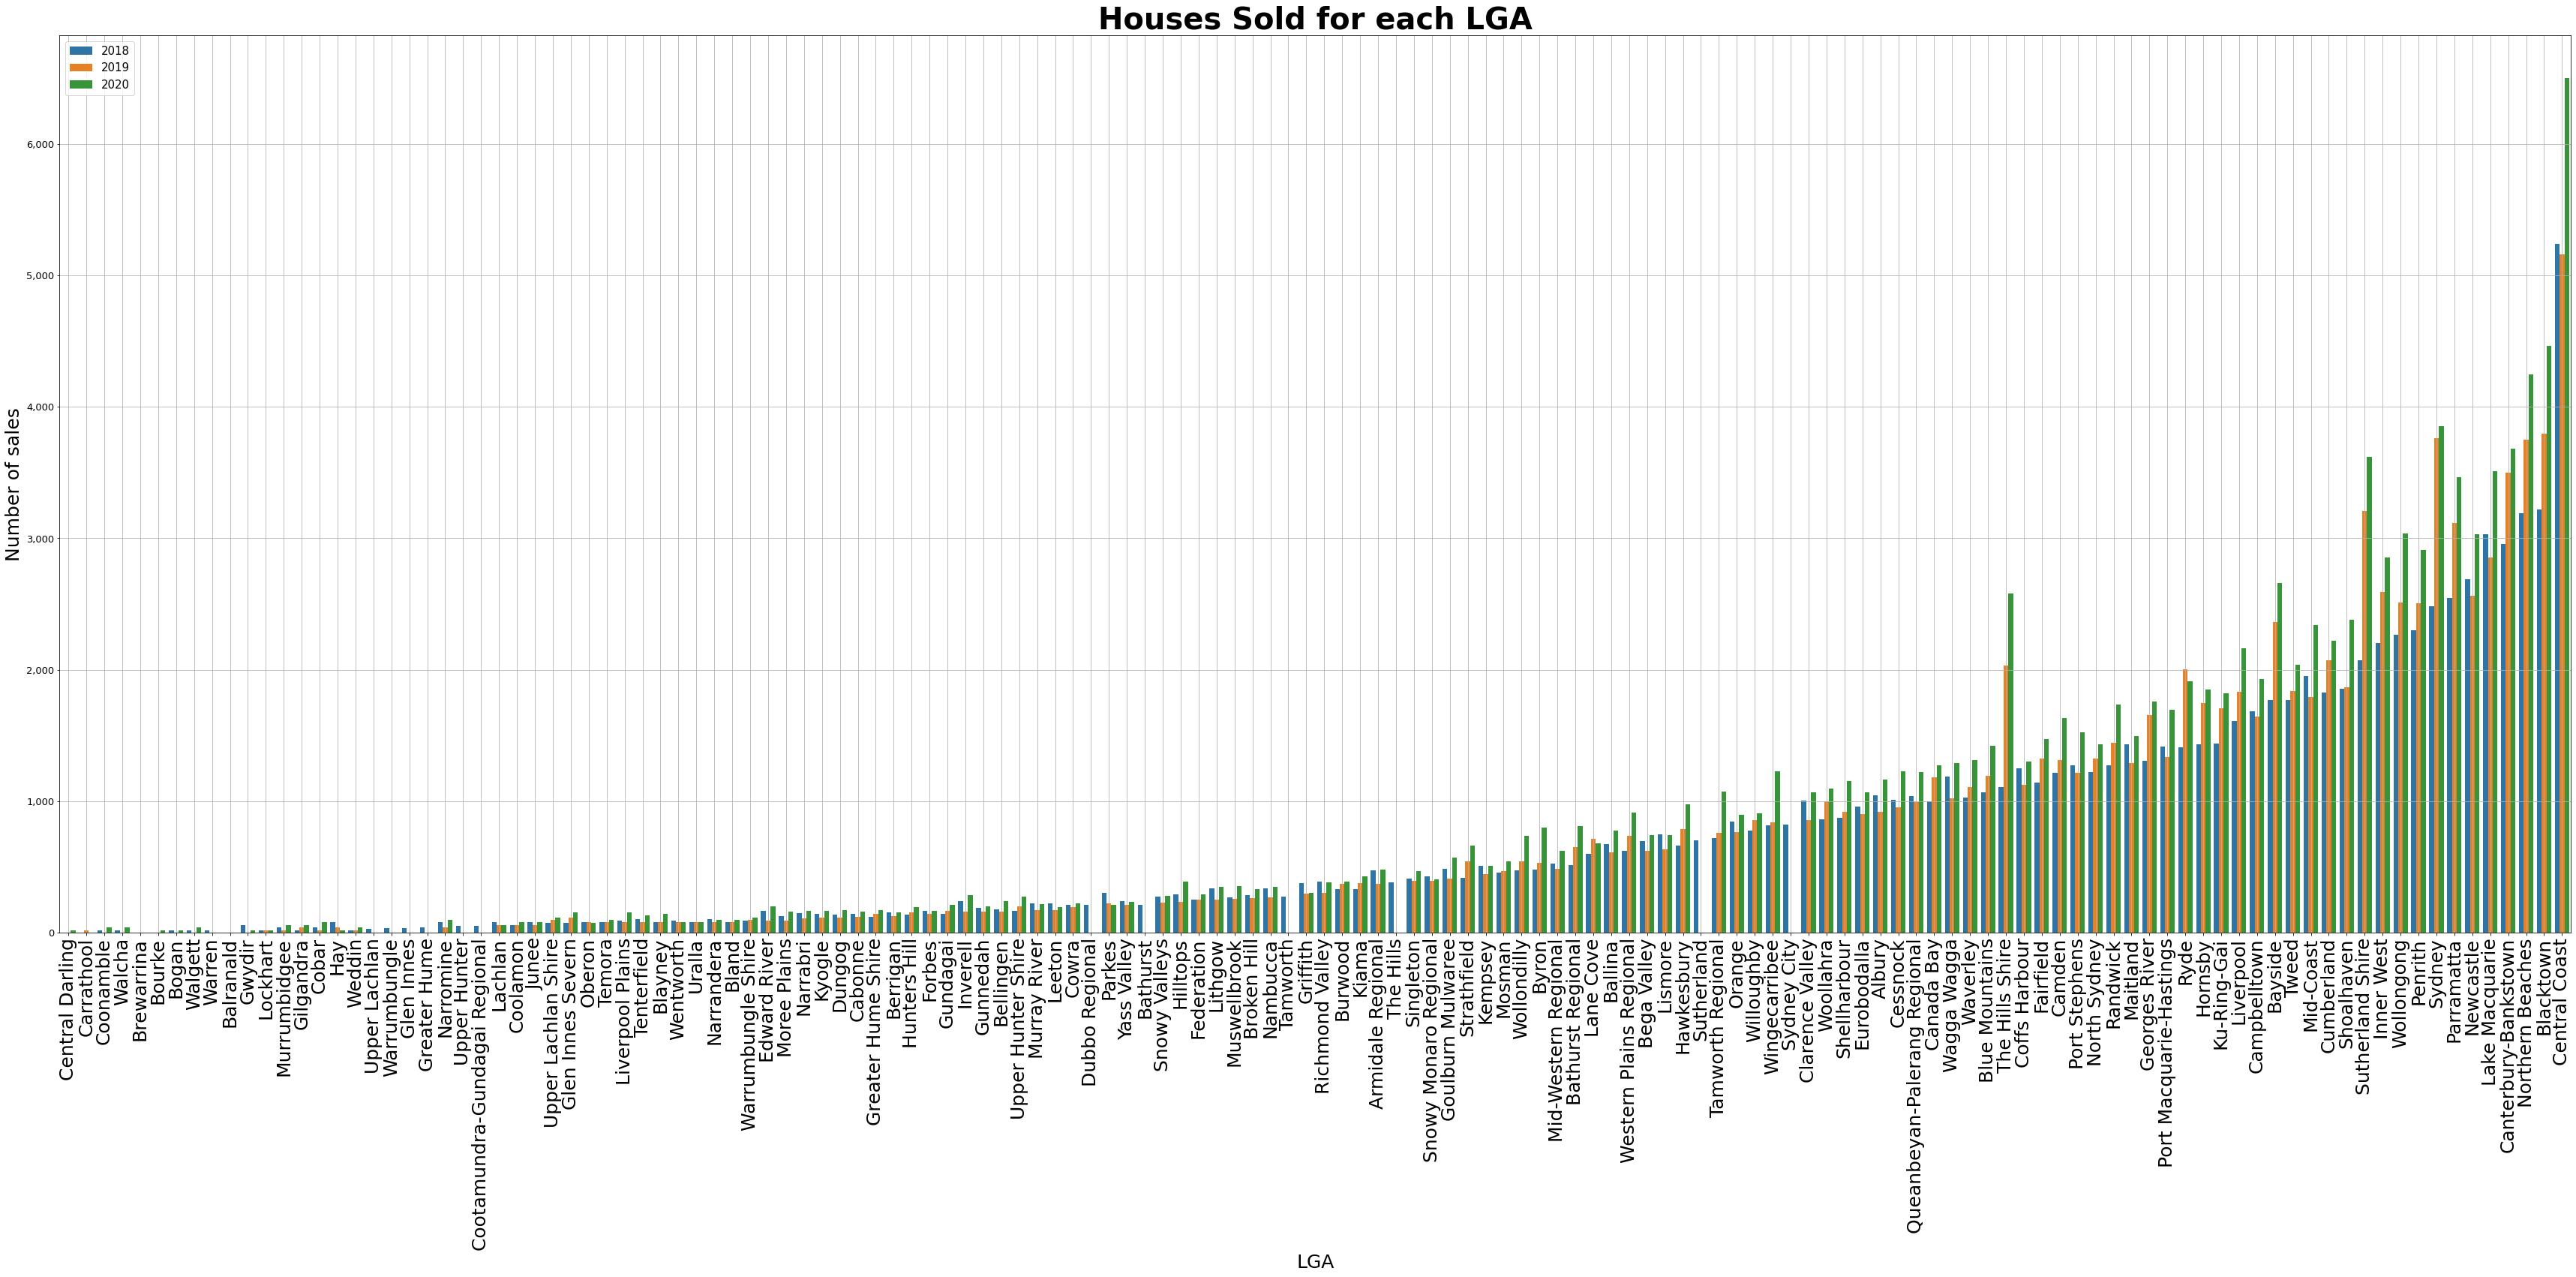

In [31]:
# bar chart of number of sales per year in each LGA
plt.figure(figsize=(60, 22))
sns.barplot(x='LGA', y='No_Of_Sales', hue='Year', data=yearly_sales_LGA.sort_values('No_Of_Sales'), saturation=0.8)

# labels
plt.title('Houses Sold for each LGA', fontsize=40, fontweight='bold')
plt.ylabel('Number of sales', fontsize=25)
plt.xlabel('LGA', fontsize=25)
plt.legend(fontsize=15)

# x, y labels format
plt.xticks(rotation=90, fontsize=25)
plt.yticks(fontsize=13)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# grid
plt.grid()   

## Further Data Exploration and Transformation

In [32]:
# merge seifa data to current dataset
sales_yr = sales_yr.merge(LGA_scores, on='LGA')
sales_yr.head()

,Year,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,,,,,,
Blacktown,2018,"607,000.00","691,500.00","821,250.00","712,000.00",968,1011,993,986,336962
Blacktown,2019,"574,500.00","668,000.00","809,000.00","690,750.00",968,1011,993,986,336962
Blacktown,2020,"603,500.00","719,000.00","861,000.00","739,000.00",968,1011,993,986,336962
Blue Mountains,2018,"561,000.00","643,750.00","757,250.00","671,000.00",1070,1039,1042,1045,76904
Blue Mountains,2019,"553,500.00","642,500.00","754,250.00","669,750.00",1070,1039,1042,1045,76904


In [33]:
# merge erp data to current dataset
sales_yr=sales_yr.merge(youth, on=['LGA','Year'])
sales_yr=sales_yr.merge(working, on=['LGA','Year'])
sales_yr=sales_yr.merge(retirees, on=['LGA','Year'])
sales_yr=sales_yr.merge(erp_males, on=['LGA','Year'])
sales_yr=sales_yr.merge(erp_females, on=['LGA','Year'])
sales_yr=sales_yr.drop(columns=['Population'])
sales_yr=sales_yr.sort_values(by='Year', ascending=True)
sales_yr

,Year,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales,IEO,IER,IRSAD,IRSD,Youth_Pop,Working_Pop,Retirees_Pop,Male_Pop,Fem_Pop
LGA,,,,,,,,,,,,,,
Blacktown,2018,"607,000.00","691,500.00","821,250.00","712,000.00",968,1011,993,986,133545,194571,37962,366730,365426
Hornsby,2018,"765,000.00","1,067,000.00","1,344,750.00","1,087,250.00",1115,1091,1115,1091,49424,77287,23921,148716,152548
Hunters Hill,2018,"1,142,500.00","1,799,250.00","2,891,250.00","2,113,250.00",1157,1093,1143,1098,4949,6874,3075,15164,14632
Willoughby,2018,"959,500.00","1,626,750.00","2,330,500.00","1,731,500.00",1157,1039,1136,1083,24923,44327,11024,78098,82450
Kiama,2018,"756,500.00","867,750.00","1,076,750.00","937,750.00",1062,1058,1056,1064,6555,10979,5453,22648,23326
Lane Cove,2018,"727,500.00","930,000.00","1,865,750.00","1,450,000.00",1171,1070,1154,1111,11590,22557,5295,39130,39754
Waverley,2018,"986,750.00","1,431,250.00","2,160,250.00","1,715,250.00",1161,1014,1140,1091,18844,45680,9516,72620,75460
Liverpool,2018,"590,000.00","711,250.00","831,250.00","715,500.00",953,1008,972,952,82603,116804,23618,222468,223582
Maitland,2018,"399,750.00","460,500.00","558,500.00","487,000.00",941,1005,966,983,28709,42547,11848,81368,84840


In [34]:
sales_yr.describe()

,Year,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales,IEO,IER,IRSAD,IRSD,Youth_Pop,Working_Pop,Retirees_Pop,Male_Pop,Fem_Pop
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,"2,019.00","689,083.33","930,102.78","1,348,794.44","1,116,500.00","1,047.33","1,021.40","1,047.87","1,030.97","37,263.10","61,915.08","16,917.22","114,964.51","117,226.29"
std,0.82,"221,607.01","432,350.85","794,972.09","595,689.52",96.48,44.20,77.89,60.83,"29,462.69","44,539.03","10,983.44","83,853.21","83,473.56"
min,"2,018.00","313,750.00","380,000.00","470,250.00","414,750.00",879.00,943.00,896.00,856.00,"4,937.00","6,874.00","3,057.00","15,164.00","14,632.00"
25%,"2,018.00","554,625.00","649,875.00","780,562.50","685,187.50",967.00,993.00,988.00,989.00,"15,400.75","30,564.50","9,448.50","55,568.00","59,930.50"
50%,"2,019.00","620,875.00","732,000.00","1,002,625.00","876,500.00","1,064.50","1,011.00","1,049.50","1,041.00","24,591.00","45,308.00","12,326.00","77,622.00","81,852.00"
75%,"2,020.00","815,562.50","1,108,187.50","1,767,937.50","1,433,875.00","1,120.00","1,058.00","1,115.00","1,083.00","52,330.00","87,686.25","24,590.50","164,367.50","165,915.50"
max,"2,020.00","1,338,750.00","2,287,250.00","3,632,750.00","2,778,000.00","1,195.00","1,104.00","1,165.00","1,115.00","137,113.00","203,924.00","43,334.00","383,324.00","382,338.00"


This pivot table that will be used for our analysis by matching the SEIFA indexes and Age group population by LGA and year with our yearly median house prices data. In this case, since census data is taken every 4 years we make the assumption that these indexes do not change and stay relatively constant across the next 4 years.

### Correlation Matrix

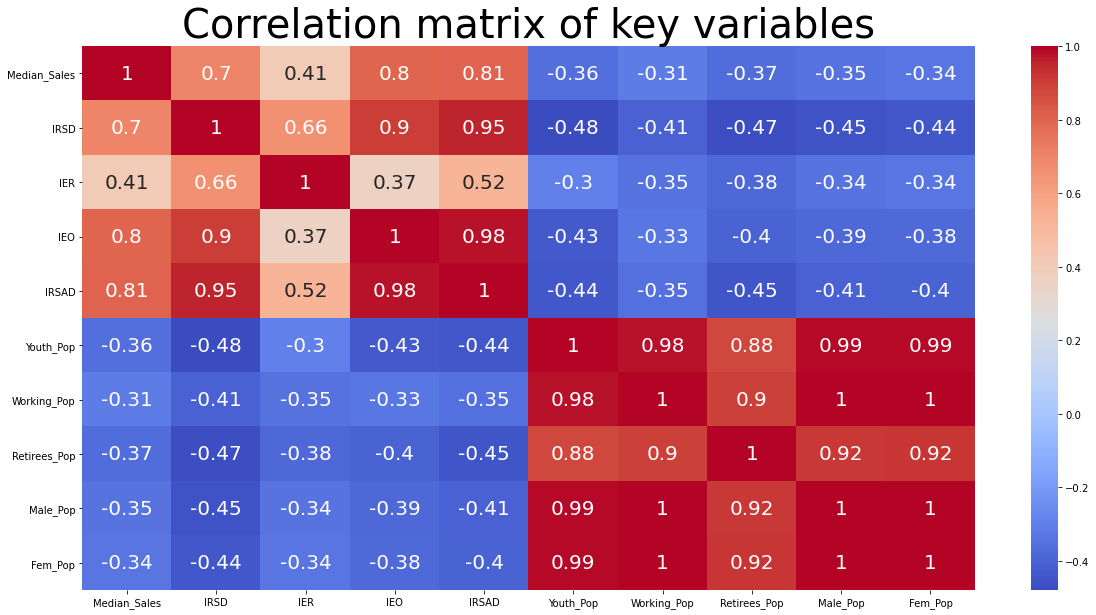

In [35]:
param = ['Median_Sales', 'IRSD','IER','IEO','IRSAD','Youth_Pop', 'Working_Pop', 'Retirees_Pop','Male_Pop','Fem_Pop']
corr1=sales_yr[param].corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr1, cmap = 'coolwarm', annot = True, annot_kws = {"size":20})
plt.title('Correlation matrix of key variables', size=40)
plt.show()

### Pairplot

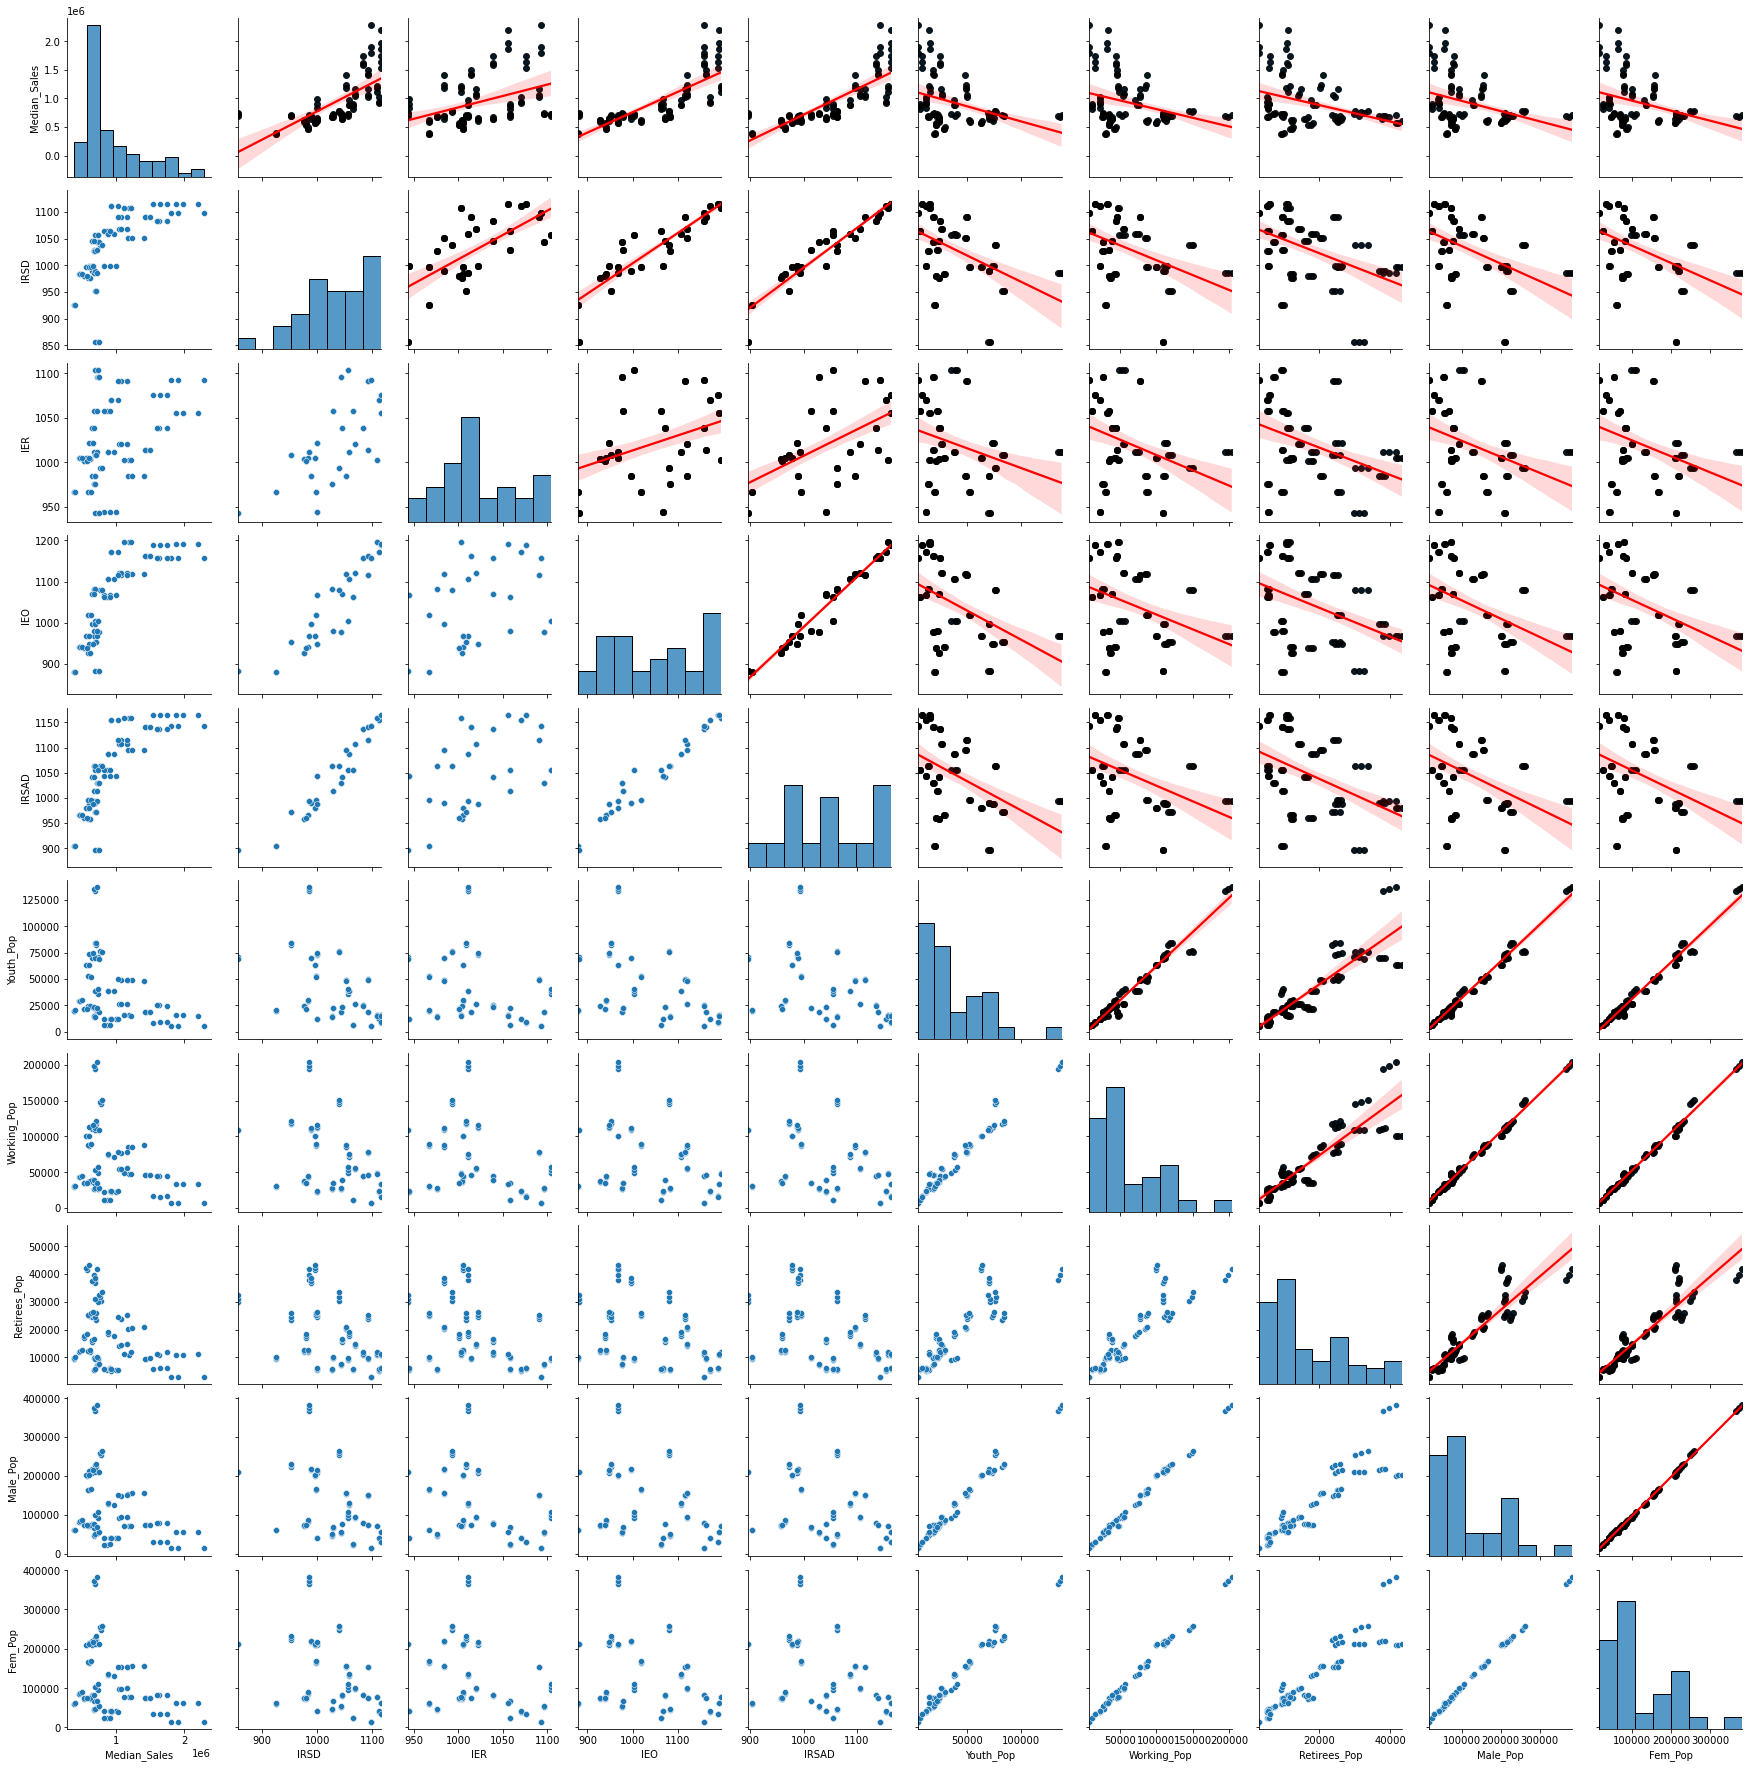

In [36]:
#visualising correlations
g = sns.pairplot(sales_yr[param])
g = g.map_upper(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})

### Analysis
We can clearly see a positive linear relationships between median sales and the SEIFA indexes. The higher the index, the higher median sales in the area are. The relationship between IER and median sales is a lot weaker than the others and the clustering is not as dense which can indicate an unreliable trend. Similarly the clustering for population is grouped towards the left and downward trending, indicating for LGAs with higher populations, the house prices would be lower in comparison with more exclusive areas with higher prices only NSW's richest can afford. For population demographics, they all seem to have a negative correlation with house prices. The more populous an LGA is the lower the median house price of that area will be which follows up from our SEIFA data reinforcing the idea that only the most exclusive areas have the highest median house prices.

# Prediction Models

## Simple Linear Regression

We examine our data using a linear regression model to get a basic understanding of the relationship between the median house prices with SEIFA and ERP indexes. We have chosen to do a 70/30 test train split in this case.

## Ranking

In [37]:
features = ['IRSD', 'IER', 'IEO', 'IRSAD', 'Youth_Pop', 'Working_Pop', 'Retirees_Pop', 'Male_Pop', 'Fem_Pop']

X = sales_yr[features]
y = sales_yr['Median_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

estimator = linear_model.LinearRegression()
selector = RFE(estimator,1)
selector.fit(X_train, y_train)
prediction = selector.predict(X_test)
feature_rankings = pd.DataFrame(
    {'Features': X_train.columns,
     'Ranking': selector.ranking_})
feature_rankings.sort_values(by=['Ranking'])

C:\Users\Pranava\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,Features,Ranking
3,IRSAD,1
0,IRSD,2
1,IER,3
2,IEO,4
5,Working_Pop,5
7,Male_Pop,6
8,Fem_Pop,7
6,Retirees_Pop,8
4,Youth_Pop,9


## Training and Testing models

In [38]:
train, test = train_test_split(sales_yr, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

X_train = train[['IRSAD']]
y_train = train['Median_Sales']

X_test = test[['IRSAD']]
y_test = test['Median_Sales']

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

(72, 14)
(18, 14)


LinearRegression()

## Training data

In [39]:
#train data
predicted = reg.predict(X_train)
SL_train_mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
SL_train_r2 = r2_score(y_train, predicted)
print("MSE:", SL_train_mse)
print("Root MSE:", np.sqrt(SL_train_mse))
print("R Squared:", SL_train_r2)
print("y = x *", reg.coef_, "+", reg.intercept_)

MSE: 71929526540.43817
Root MSE: 268196.8056119203
R Squared: 0.6312866048000843
y = x * [4366.70155675] + -3652022.5442589815


## Testing data

In [40]:
# test data
predicted = reg.predict(X_test)
SL_test_mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
SL_test_r2 = r2_score(y_test, predicted)
print("MSE:", SL_test_mse)
print("Root MSE:", np.sqrt(SL_test_mse))
print("R Squared:", SL_test_r2)
print("y = x *", reg.coef_, "+", reg.intercept_)

MSE: 32384003669.352757
Root MSE: 179955.56026239577
R Squared: 0.7735880019862202
y = x * [4366.70155675] + -3652022.5442589815


## Linear regression scatterplot

<ipython-input-41-7f0afdb0d671>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])


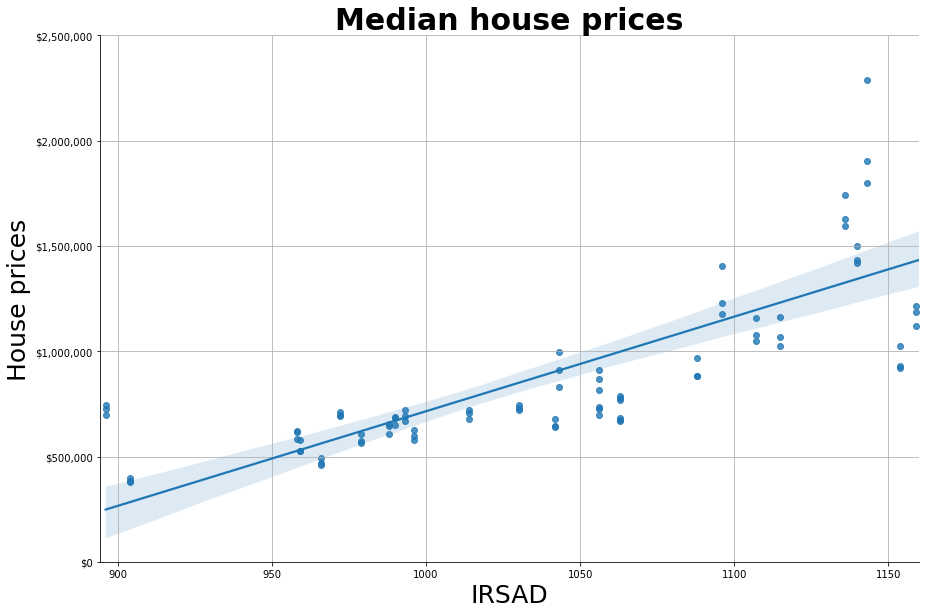

In [41]:
# seaborn lineplot
sns.lmplot(x='IRSAD', y='Median_Sales', data=sales_yr, height=8, aspect=1.5)
plt.grid()   
plt.title('Median house prices', fontsize=30, fontweight='bold')
plt.ylabel('House prices', fontsize=25)
plt.xlabel('IRSAD', fontsize=25)

# x and y limits
plt.xlim((894, 1160))
plt.ylim((0, 2500000))

# y labels format
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in current_values])

plt.show()

## Multiple Linear Regression

In [42]:
# recursive feature elimination
X_train = train[['IRSD', 'IER', 'IEO', 'IRSAD', 'Youth_Pop', 'Working_Pop', 'Retirees_Pop', 'Male_Pop', 'Fem_Pop']]
y_train = train['Median_Sales']

X_test = test[['IRSD', 'IER', 'IEO', 'IRSAD', 'Youth_Pop', 'Working_Pop', 'Retirees_Pop', 'Male_Pop', 'Fem_Pop']]
y_test = test['Median_Sales']
lr_model= LinearRegression()
rfe= RFE(estimator=lr_model, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [43]:
# ranking system
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected False, Rank: 3.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 6.000
Column: 7, Selected False, Rank: 8.000
Column: 8, Selected False, Rank: 5.000


In [44]:
r2_scores = []
for i in range(1,10):
    clf = LinearRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    
    # training model
    rfe.fit(X_train, y_train)
    
    # predicting on test set
    y_pred = rfe.predict(X_test)
    r2_rfe = r2_score(y_test, y_pred)
    
    # print this
    print("R Squared on test set using", i, "features: ", r2_rfe)
    
    # append to the list
    r2_scores.append(r2_rfe)

R Squared on test set using 1 features:  0.7735880019862202
R Squared on test set using 2 features:  0.8160881630900225
R Squared on test set using 3 features:  0.7874317828276172
R Squared on test set using 4 features:  0.7881585047296861
R Squared on test set using 5 features:  0.7794026498671346
R Squared on test set using 6 features:  0.8013618030771166
R Squared on test set using 7 features:  0.8047735376104989
R Squared on test set using 8 features:  0.8049467917189288
R Squared on test set using 9 features:  0.8049467917188924


C:\Users\Pranava\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Pranava\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Pranava\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Pranava\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass 

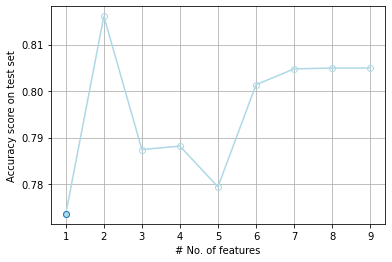

In [45]:
# graph the rankings 
estimator = LinearRegression()
r2_scores = []
for i in range(1, 10):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    r2_rfe = r2_score(y_test, predicted)
    r2_scores.append(r2_rfe)

best = 1
for item in r2_scores:
    if item < r2_scores[best - 1]:
        best = r2_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), r2_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, r2_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

### Training data

In [46]:
# adding more variables to training data
# now train a model on multiple variables
X_train = train[['IRSD', 'IRSAD']]
y_train = train['Median_Sales']

X_test = test[['IRSD', 'IRSAD']]
y_test = test['Median_Sales']

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_train)
ML_train_mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
ML_train_r2 = r2_score(y_train, predicted)

print("MSE:", ML_train_mse)
print("Root MSE:", np.sqrt(ML_train_mse))
print("R Squared:", ML_train_r2)
print("y = x *", reg.coef_, "+", reg.intercept_)
print(y_train)

MSE: 60248441505.70476
Root MSE: 245455.5794959747
R Squared: 0.6911642757639567
y = x * [-5872.63767281  8807.977921  ] + -2248184.8360638353
LGA
Camden             735,750.00
Cessnock           380,000.00
Hunters Hill     1,905,000.00
Maitland           467,000.00
Fairfield          744,500.00
Lane Cove          930,000.00
Hunters Hill     2,287,250.00
Port Stephens      577,500.00
North Sydney     1,212,500.00
Mosman           1,643,250.00
Newcastle          625,000.00
North Sydney     1,118,750.00
Blacktown          691,500.00
Waverley         1,501,250.00
Liverpool          699,000.00
Cessnock           396,000.00
Burwood            828,250.00
Lake Macquarie     571,750.00
Kiama              911,000.00
Cessnock           382,000.00
Hawkesbury         705,000.00
Maitland           492,250.00
Newcastle          598,750.00
Penrith            654,750.00
Woollahra        1,980,500.00
Strathfield        685,000.00
Blue Mountains     680,500.00
Kiama              814,500.00
Lane Cove    

### Testing data

In [47]:
# adding more variables to testing data
# now train a model on multiple variables
X_train = train[['IRSD', 'IRSAD']]
y_train = train['Median_Sales']

X_test = test[['IRSD', 'IRSAD']]
y_test = test['Median_Sales']

predicted = reg.predict(X_test)
ML_test_mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
ML_test_r2 = r2_score(y_test, predicted)

print("MSE:", ML_test_mse)
print("Root MSE:", np.sqrt(ML_test_mse))
print("R Squared:", ML_test_r2)
print("y = x *", reg.coef_, "+", reg.intercept_)
print(y_test)

MSE: 26305150140.354477
Root MSE: 162188.62518794122
R Squared: 0.8160881630900225
y = x * [-5872.63767281  8807.977921  ] + -2248184.8360638353
LGA
Wollongong        648,250.00
Willoughby      1,626,750.00
Newcastle         580,000.00
Liverpool         690,250.00
Burwood           909,000.00
Liverpool         711,250.00
Waverley        1,431,250.00
Kiama             867,750.00
Strathfield       675,500.00
Randwick        1,402,750.00
Willoughby      1,741,250.00
Penrith           608,750.00
Penrith           644,750.00
Camden            727,750.00
Port Stephens     527,750.00
Wollongong        688,000.00
Shellharbour      622,250.00
Canada Bay      1,158,250.00
Name: Median_Sales, dtype: float64


### Linear Regression Analysis
Adding an extra variable did not significantly improve the accuracy of the model. MSE corresponds to a prediction error of 167,029 which is a large discrepancy in value and cannot provide investors a confident estimate of house prices. In terms of error this stands at 18% of the mean value ($930,102) for median sales which is a large prediction error. There is a correlation between the SEIFA data and the Median Sales shown by the R^2 value of 0.9 however this value would need to be closer to 1 to indicate a definitive and strong relationship between the variables. Based on the results the model is slightly overfitting as both models do not perform well,have a very high MSE and the results between training and test sets differ.

## Random Forest Regression

C:\Users\Pranava\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median_Sales', ylabel='Density'>

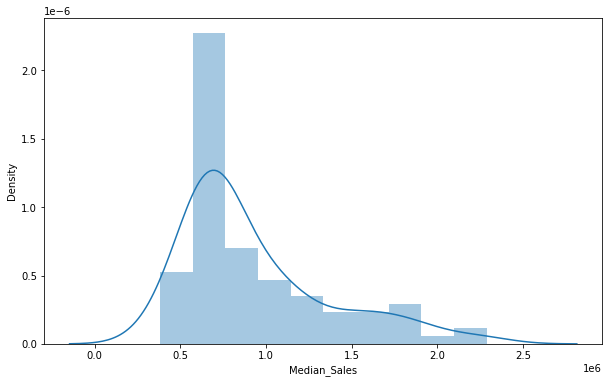

In [48]:
# plot the distribution of Median_Sales
plt.figure(figsize=(10, 6))
sns.distplot(sales_yr['Median_Sales'])

The median sales is clearly not normally distributed with it being skewed to the left. An ideal data set to work with here would be normally skewed.

In [49]:
sales_yr

,Year,Lower_Bound_Sales,Median_Sales,Upper_Bound_Sales,Mean_Sales,IEO,IER,IRSAD,IRSD,Youth_Pop,Working_Pop,Retirees_Pop,Male_Pop,Fem_Pop
LGA,,,,,,,,,,,,,,
Blacktown,2018,"607,000.00","691,500.00","821,250.00","712,000.00",968,1011,993,986,133545,194571,37962,366730,365426
Hornsby,2018,"765,000.00","1,067,000.00","1,344,750.00","1,087,250.00",1115,1091,1115,1091,49424,77287,23921,148716,152548
Hunters Hill,2018,"1,142,500.00","1,799,250.00","2,891,250.00","2,113,250.00",1157,1093,1143,1098,4949,6874,3075,15164,14632
Willoughby,2018,"959,500.00","1,626,750.00","2,330,500.00","1,731,500.00",1157,1039,1136,1083,24923,44327,11024,78098,82450
Kiama,2018,"756,500.00","867,750.00","1,076,750.00","937,750.00",1062,1058,1056,1064,6555,10979,5453,22648,23326
Lane Cove,2018,"727,500.00","930,000.00","1,865,750.00","1,450,000.00",1171,1070,1154,1111,11590,22557,5295,39130,39754
Waverley,2018,"986,750.00","1,431,250.00","2,160,250.00","1,715,250.00",1161,1014,1140,1091,18844,45680,9516,72620,75460
Liverpool,2018,"590,000.00","711,250.00","831,250.00","715,500.00",953,1008,972,952,82603,116804,23618,222468,223582
Maitland,2018,"399,750.00","460,500.00","558,500.00","487,000.00",941,1005,966,983,28709,42547,11848,81368,84840


### Prepare data

In [50]:
# convert to array numerical values
X = sales_yr[['Mean_Sales']].values
y = sales_yr['Median_Sales'].values

### Training and Testing datasets

In [51]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (72, 1)
X_test Shape: (18, 1)
y_train Shape: (72,)
y_test Shape: (18,)


### Train model

In [52]:
# instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# train the model on training data
rf.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [53]:
# predict on train data
y_pred = rf.predict(X)
y_pred

array([ 692486.5 , 1021592.5 , 1698447.25, 1564336.  ,  815926.25,
        989159.75, 1474653.75,  706557.5 ,  461802.5 , 1646892.25,
        603465.25,  741295.75, 1172897.  ,  780784.5 ,  634597.  ,
        611668.75,  527338.5 , 1141291.75,  717347.  ,  728165.75,
        573489.25,  712307.75, 1925183.  ,  643691.5 ,  924294.25,
        716102.75,  690386.  , 1047897.25,  386029.75,  950373.  ,
        646027.25, 1189412.  ,  660839.25,  531277.25,  699125.25,
        598919.25,  644651.25,  587775.75,  922719.5 , 1080136.25,
        725573.25,  835627.  ,  588733.5 , 1806480.25, 1006231.75,
       1703756.75,  464448.  , 1969071.  ,  785227.75,  951369.25,
        569224.  , 1509220.5 , 1055335.25, 1073639.5 ,  386849.75,
       1085557.25, 1559510.75,  698157.5 ,  694796.  ,  694328.25,
        630826.  , 1477276.25,  785287.75,  915489.  , 1334466.25,
        700175.  ,  734317.  ,  497283.5 ,  575703.  ,  722125.  ,
        688317.5 ,  866379.25,  721536.75, 1120674.25,  394467

In [54]:
# predict on test data
prediction = rf.predict(y.reshape(-1, 1))
prediction

array([ 660839.25, 1020918.  , 1581489.5 , 1248992.25,  747679.75,
        811560.25, 1085557.25,  692579.25,  418580.25,  922719.5 ,
        573489.25,  649449.75,  949861.75,  721575.75,  620620.75,
        598961.25,  502836.  , 1059974.75,  697471.  ,  694796.  ,
        538761.  ,  693396.  , 1617738.75,  612117.75,  873793.75,
        693713.5 ,  635253.5 , 1016534.25,  386849.75,  799139.5 ,
        633468.5 , 1029711.75,  649453.25,  502836.  ,  633210.25,
        587775.75,  612117.75,  568688.75,  699125.25,  891898.75,
        693967.25,  734317.  ,  566567.75, 1477276.25,  644140.75,
       1574209.  ,  454526.25, 1432558.5 ,  728165.75,  785227.75,
        533442.  , 1141291.75, 1021089.  ,  898358.  ,  386849.75,
        898358.  , 1230472.5 ,  660802.5 ,  672705.  ,  685306.  ,
        587712.  , 1564054.  ,  635128.25,  785227.75, 1069529.25,
        652864.25,  732136.5 ,  464744.5 ,  563833.25,  690386.  ,
        633822.25,  791894.5 ,  700034.  , 1064508.75,  386849

### Training data

In [55]:
predicted = rf.predict(X_train)
RF_train_mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
RF_train_r2 = r2_score(y_train, predicted)
print("MSE:", RF_train_mse)
print("Root MSE:", np.sqrt(RF_train_mse))
print("R Squared:", RF_train_r2)
print(y_train)

MSE: 5652416142.253472
Root MSE: 75182.55211319626
R Squared: 0.9566465838139697
[1162750.  580000. 1875000. 1431250. 1741250.  814500.  606250.  382000.
 1158250.  911000.  699000. 1626750.  685000.  744500. 1047250.  705000.
  564250. 1417250.  396000.  696500. 1023000.  867750.  615750. 1175250.
  728250.  769500.  930000.  919250.  577500.  691500.  680000.  380000.
  667750.  608750.  643750. 1076500.  598750. 1229750.  622250.  690250.
  909000. 1067000.  668000.  721500.  644750. 1212500.  721500.  965750.
  881500.  654750. 1402750.  719000.  571750.  625000.  735750.  727750.
  583750.  467000. 1118750.  688000.  695750. 1184750.  680500.  642500.
  726750. 1643250. 1533000.  787500.  492250. 1501250. 1980500.  675500.]


### Testing data

In [56]:
predicted = rf.predict(X_test)
RF_test_mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
RF_test_r2 = r2_score(y_test, predicted)
print("MSE:", RF_test_mse)
print("Root MSE:", np.sqrt(RF_test_mse))
print("R Squared:", RF_test_r2)
print(y_test)

MSE: 4624174255.375
Root MSE: 68001.28127745094
R Squared: 0.9868915257518776
[1799250.  776000. 1026500.  828250.  746000.  648250. 1744500. 1905000.
 2287250. 2195750.  711250.  685250.  528250.  880250.  460500.  527750.
  996500. 1594250.]


## Comparing the Models

In [57]:
data = {'Model':['Simple Linear Regression', 'Multiple Linear Regression', 'Random Forest Regression'], 'Training mse':[np.sqrt(SL_train_mse), np.sqrt(ML_train_mse), np.sqrt(RF_train_mse)], 'Training r2': [SL_train_r2, ML_train_r2, RF_train_r2],  'Testing mse':[np.sqrt(SL_test_mse), np.sqrt(ML_test_mse), np.sqrt(RF_test_mse)],  'Testing r2':[SL_test_r2, ML_test_r2, RF_test_r2]}#creating dataframe with column names and using data from variables 'SimpleLinearRegression', 'MultipleLinearRegression', RandomForestRegression 
df = pd.DataFrame(data)#put data into dataframe
df #display dataframe

,Model,Training mse,Training r2,Testing mse,Testing r2
0,Simple Linear Regression,"268,196.81",0.63,"179,955.56",0.77
1,Multiple Linear Regression,"245,455.58",0.69,"162,188.63",0.82
2,Random Forest Regression,"75,182.55",0.96,"68,001.28",0.99


For Linear regression, we can say that having more than one independant variables when testing will produce better results. However, the Random Forest regression proved to be the most robust model for our data set and providing the highest accuracy in terms of having the lowest error score.

## Conclusion



There are many factors that would affect house prices in different areas in the real world and these factors are always bound to change. One of the most biggest factors to consider in general house prices in one area is the rate of increase in population due to development of infrastructure, environment, and the shift of socio-economic status' across the region. Sydney is in the top 2 cities in Australia in terms of leading population which reflects the development of these cities compared to others. From our Linear regression models, the results tell us that when one independant variable is tested, the Index of Relative Socio-economic Advantage and Disadvantage (IRSAD) factor from the SEIFA data produces the best results of predicting house prices. The Random Forest Regression method to predict house prices in an LGA produces the highest accuracy results which reflect its reliability at 96 and 99 percent for training and testing data respectively. The limiation of data for our analysis does cannot really state a high accuracy of results, however the methods and process would serve as a great template when more data was available, with the possibility of producing a wider scaled variety of results. To reiterate, the goals of our analysis were to analyse the effects of certain demographic factors on house prices in NSW. We were successfully able to identify some factors (IRSAD and IRSD)  that have a high correlation with median sales. 